# Decision Trees and Random Forests in Python

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# get the data
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


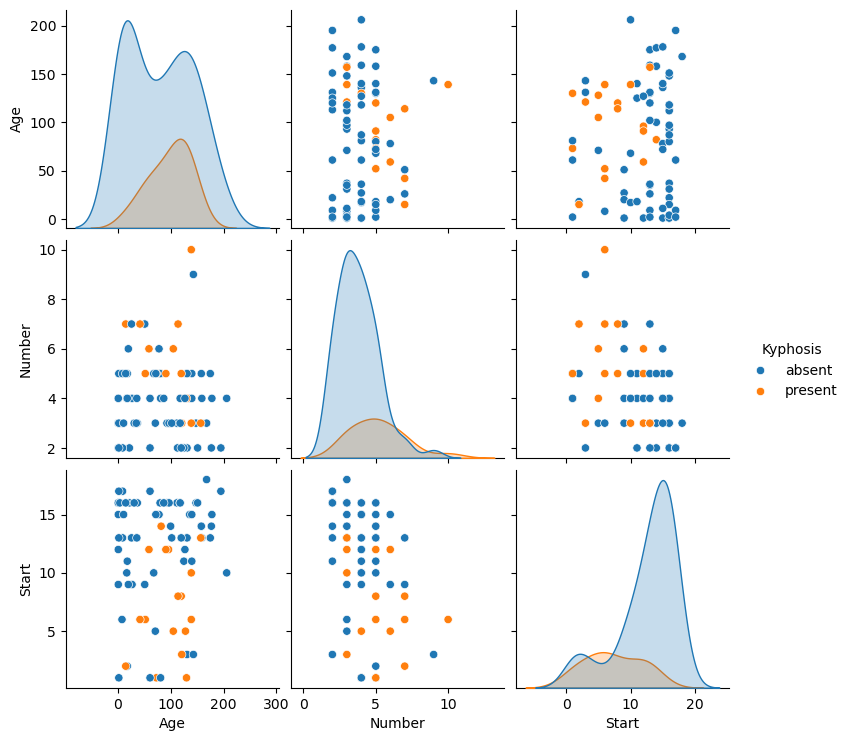

In [4]:
# EDA

sns.pairplot(df, hue='Kyphosis')

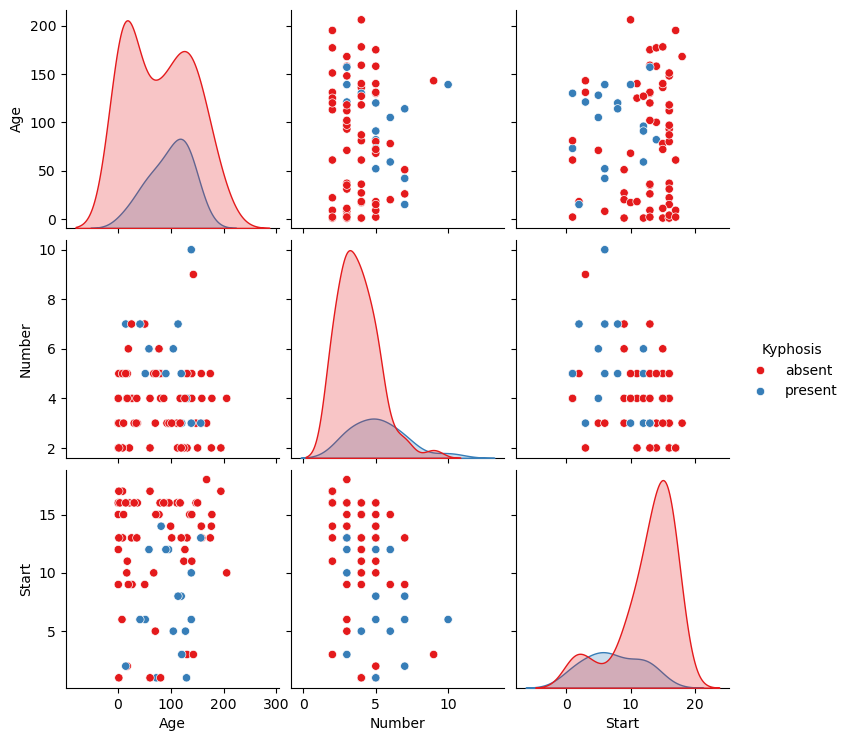

In [5]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

### train test split 

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
X = df.drop('Kyphosis', axis=1)
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [8]:
y = df['Kyphosis']
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Trees
start just by training a single decision tree.

In [10]:
# dtree obj
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [12]:
predictions = dtree.predict(X_test)

In [13]:
predictions

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [15]:
print(confusion_matrix(y_test, predictions))

[[13  4]
 [ 6  2]]


## Tree Visualization


In [16]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [17]:
df.columns[1:]

Index(['Age', 'Number', 'Start'], dtype='object')

In [18]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

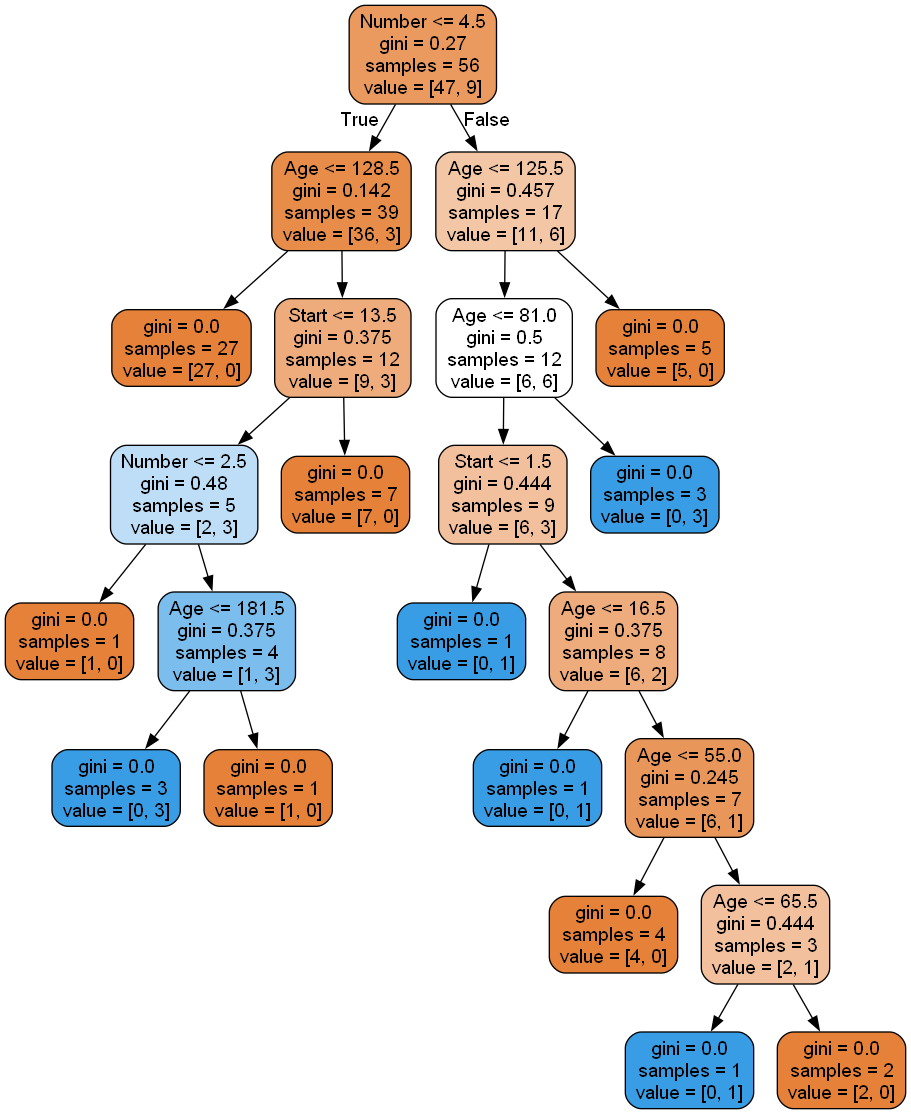

In [19]:
dot_data = StringIO()
export_graphviz(decision_tree=dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random Forests

In [20]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

